<a href="https://colab.research.google.com/github/Ajith013/AI/blob/master/keras_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

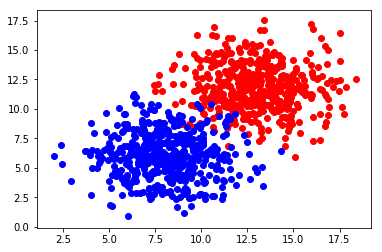

In [0]:
n_pts = 500
np.random.seed(0)
xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack((xa, xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1], color='r')
plt.scatter(X[n_pts:, 0], X[n_pts:, 1], color='b')
plt.show()

In [0]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2, ), activation='sigmoid'))
adam = Adam(lr = 0.1) #optimizer
model.compile(adam, loss= 'binary_crossentropy', metrics=['accuracy']) #learning process
h = model.fit(x=X, y=y, verbose = 1, batch_size= 50, epochs = 500, shuffle = 'true')

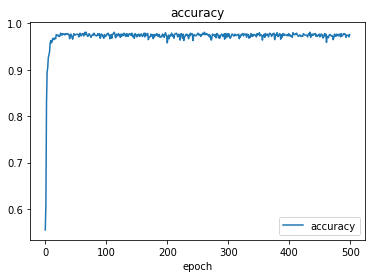

In [0]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

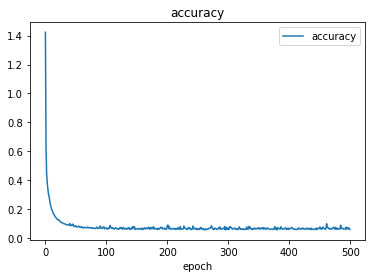

In [0]:
plt.plot(h.history['loss'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [0]:
def plot_decision_boundary(X,y,model):
    x_span=np.linspace(min(X[:,0]) -1, max(X[:,0])+1)
    y_span=np.linspace(min(X[:,1]) -1 , max(X[:,1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid= np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

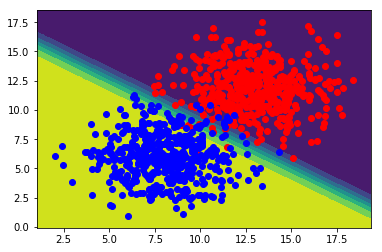

In [0]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1], color='r')
plt.scatter(X[n_pts:, 0], X[n_pts:, 1], color='b')


Prediction is : [[ 0.99998558]]


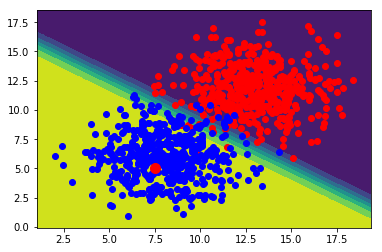

In [0]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1], color='r')
plt.scatter(X[n_pts:, 0], X[n_pts:, 1], color='b')
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', color = 'r', markersize= 10)
print("Prediction is :", prediction)